## 习题 0.3-15 （手动运算过程见PDF文件）

In [1]:
8.3-7.3-1

8.881784197001252e-16

In [2]:
8.4-7.4-1

0.0

In [3]:
8.8-7.8-1

8.881784197001252e-16

In [4]:
2**-50

8.881784197001252e-16

## 习题 1.2-31 （S值的求解过程见PDF文件）

In [5]:
import numpy as np
import matplotlib.pyplot as plt

r=0.250000


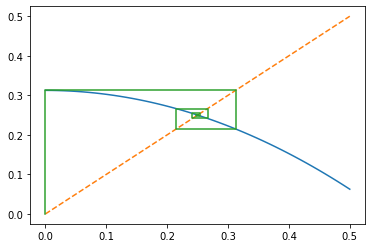

In [6]:
def fun1(x):
    return 5/16-x**2

t=np.linspace(0,0.5)
plt.plot(t,fun1(t),'-')
plt.plot(t,t,'--')

x0=0
data1=np.array([0,0])
error=1

while error>1e-6:
    x=fun1(x0)
    error=np.abs(x-x0)
    data1=np.row_stack((data1,[[x0,x],[x,x]]))
    x0=x

print("r=%6f"%x)
plt.plot(data1[:,0],data1[:,1],'-')

r=-1.250000


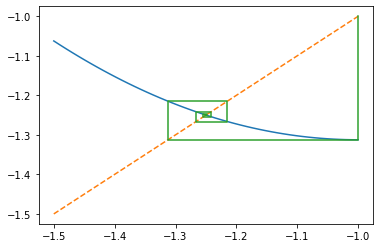

In [7]:
def fun2(x):
    return x**2+2*x-5/16

t=np.linspace(-1.5,-1)
plt.plot(t,fun2(t),'-')
plt.plot(t,t,'--')

x0=-1
data2=np.array([-1,-1])
error=1

while error>1e-6:
    x=fun2(x0)
    error=np.abs(x-x0)
    data2=np.row_stack((data2,[[x0,x],[x,x]]))
    x0=x

print("r=%6f"%x)
plt.plot(data2[:,0],data2[:,1],'-')

## 编程 1.1-2

In [8]:
steps=0
def Bisecion(fun, a, b, error):
    '''
    # 二分法求解函数
    ## 参数说明
    求解函数f(x)==0```fun```，求解区间```[a,b]```，求解误差```error```
    ## 举例
    >>> import numpy as np
    >>> Bisecion(np.sin, 3, 4 ,10e-8)
    3.1415926590561867
    >>> def f(x):\n
            return x**2-2
    >>> Bisecion(f ,1 ,2 ,10e-8)
    1.4142135605216026
    '''
    global steps
    steps=0
    while (b-a)/2 > error:
        c = (b+a)/2
        if fun(c) == 0:
            return c
        elif fun(a)*fun(c) > 0:
            a = c
        else:
            b = c
        steps+=1
    return (b+a)/2


In [9]:
def fun_a(x):
    return x**5+x-1

def fun_b(x):
    return np.sin(x)-6*x-5

def fun_c(x):
    return np.log(x)+x**2-3

print("(a)","r=%11.8f"%Bisecion(fun_a, 0,1,1e-8),"  steps=%d"%steps)
print("(b)","r=%11.8f"%Bisecion(fun_b,-2,0,1e-8),"  steps=%d"%steps)
print("(c)","r=%11.8f"%Bisecion(fun_c, 1,2,1e-8),"  steps=%d"%steps)

(a) r= 0.75487766   steps=26
(b) r=-0.97089892   steps=27
(c) r= 1.59214293   steps=26


## 编程 1.1-6

In [10]:
def fun(x):
    return np.cos(x)-np.sin(x)

print("r=%.6f"%Bisecion(fun,0,1,1e-6),"  steps=%d"%steps)


r=0.785398   steps=19


## 编程 1.2-4

In [11]:
steps=0
s=0
def FPI(fun,x0,errorArg):
    '''
    # 不动点迭代法求解函数
    ## 参数说明
    输入函数g(x)==x```fun```，求解起点```x0```，求解误差```errorArg```
    ## 举例
    >>> import numpy as np
    >>> Bisecion(np.cos, 1 ,1e-8)
    0.7390851300853067
    >>> def f(x):\n
            return (1+2*x**3)/(1+3*x**2)
    >>> Bisecion(f ,1 ,1e-8)
    0.6823278038280193
    '''
    global steps
    global s
    steps=0
    error=1
    while error>errorArg:
        x=fun(x0)
        error=np.abs(x-x0)
        x0=x
        steps+=1
    s=np.abs(fun(x0)-x0)/error
    return x0

In [12]:
def fun(x):
    global A
    return (2*x+A/x**2)/3

A=2
print("(a)","r=%10.8f"%FPI(fun,1,1e-8),"  Start at 1   steps=%d"%steps)
A=3
print("(b)","r=%10.8f"%FPI(fun,1,1e-8),"  Start at 1   steps=%d"%steps)
A=5
print("(c)","r=%10.8f"%FPI(fun,1,1e-8),"  Start at 1   steps=%d"%steps)


(a) r=1.25992105   Start at 1   steps=5
(b) r=1.44224957   Start at 1   steps=6
(c) r=1.70997595   Start at 1   steps=6


## 编程 1.2-6 （S_t由微分算法给出，求解过程见1.2-6(*).nb文件）

In [13]:
def fun_a2(x):
    return (2*x+1)/(2*x**2-4)

def fun_a3(x):
    return (6*x+1)/(2*x**2)

def fun_a1(x):
    return np.power(-x**3+6*x+1,1/3)

print("(a3)","r=%9.6f"%FPI(fun_a3,-2,1e-6),"  Start at -2   steps=%3d"%steps,"  S=%f"%s,"S_t=0.887015")
print("(a2)","r=%9.6f"%FPI(fun_a2,0,1e-6),"  Start at  0   steps=%3d"%steps,"  S=%f"%s,"S_t=0.478463")
print("(a1)","r=%9.6f"%FPI(fun_a1,2,1e-6),"  Start at  2   steps=%3d"%steps,"  S=%f"%s,"S_t=0.389544")


(a3) r=-1.641783   Start at -2   steps=113   S=0.887015 S_t=0.887015
(a2) r=-0.168254   Start at  0   steps= 18   S=0.478463 S_t=0.478463
(a1) r= 1.810038   Start at  2   steps= 15   S=0.389544 S_t=0.389544


In [14]:
def fun_b1(x):
    return (3*x-x**3-np.exp(x-2))/2

def fun_b2(x):
    return np.exp(x-2)+x**3

def fun_b3(x):
    return np.power(x-np.exp(x-2),1/3)

print("(b1)","r=%9.6f"%FPI(fun_b1,-1,1e-6),"  Start at -1   steps=%3d"%steps,"  S=%f"%s,"S_t=0.095590")
print("(b2)","r=%9.6f"%FPI(fun_b2,0,1e-6),"  Start at  0   steps=%3d"%steps,"  S=%f"%s,"S_t=0.239939")
print("(b3)","r=%9.6f"%FPI(fun_b3,1,1e-6),"  Start at  1   steps=%3d"%steps,"  S=%f"%s,"S_t=0.376010")


(b1) r=-1.023482   Start at -1   steps=  6   S=0.095590 S_t=0.095590
(b2) r= 0.163822   Start at  0   steps=  9   S=0.239938 S_t=0.239939
(b3) r= 0.788942   Start at  1   steps= 13   S=0.376010 S_t=0.376010


In [15]:
def fun_c1(x):
    return (1+10*x-6*x**3-np.exp(2*x))/5

def fun_c2(x):
    return (-1+np.exp(2*x))/(5-6*x**2)

def fun_c3(x):
    return np.log(1+5*x-6*x**3)/2

print("(c1)","r=%9.6f"%FPI(fun_c1,-1,1e-6),"  Start at  -1   steps=%3d"%steps,"  S=%f"%s,"S_t=0.487287")
print("(c2)","r=%9.6f"%FPI(fun_c2,0.5,1e-6),"  Start at 0.5   steps=%3d"%steps,"  S=%f"%s,"S_t=0.400000")
print("(c3)","r=%9.6f"%FPI(fun_c3,0.5,1e-6),"  Start at 0.5   steps=%3d"%steps,"  S=%f"%s,"S_t=0.070062")

(c1) r=-0.818094   Start at  -1   steps= 15   S=0.487286 S_t=0.487287
(c2) r= 0.000000   Start at 0.5   steps= 20   S=0.400001 S_t=0.400000
(c3) r= 0.506308   Start at 0.5   steps=  5   S=0.070063 S_t=0.070062


## 编程 1.3-5

令 $F(x)=(x - 1)(x - 2)(x - 3)(x - 4), \varepsilon=10^{-6}, g(x)=x^6$，则 $f'(4)=3!=6$
$$\therefore \kappa = |\frac{g(r)}{r F'(r)}| = 170.667$$
$$\Delta r \thickapprox -\frac{\varepsilon g(r)}{F'(r)} = \frac{10^{-6} \times 4^6}{6} = 0.000682667$$
$$\therefore r' = r+\Delta r = 4.000682667$$

使用Mathmatica（见1.3-5.nb文件）```FindRoot```求解得：
$$r'=4.000682512$$
使用MATLAB（见1.3-5.m文件）```fzero```求解得：
$$r'=4.000682511$$

In [16]:
def fun(x):
    return (x - 1)*(x - 2)*(x - 3)*(x - 4)-10**(-6)*x**6

print(Bisecion(fun, 4, 5, 1e-10))

4.000682511541527
